In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [102]:
marketing = pd.read_csv('marketing.csv')

In [103]:
print(marketing.head())

   Unnamed: 0     user_id date_served marketing_channel          variant  \
0           0  a100000029  2018-01-01         House Ads  personalization   
1           1  a100000030  2018-01-01         House Ads  personalization   
2           2  a100000031  2018-01-01         House Ads  personalization   
3           3  a100000032  2018-01-01         House Ads  personalization   
4           4  a100000033  2018-01-01         House Ads  personalization   

   converted language_displayed language_preferred    age_group  \
0       True            English            English   0-18 years   
1       True            English            English  19-24 years   
2       True            English            English  24-30 years   
3       True            English            English  30-36 years   
4       True            English            English  36-45 years   

  date_subscribed date_canceled subscribing_channel  is_retained  DoW  \
0      2018-01-01           NaN           House Ads         True  0

After analysing the table, I found these imputs:
1. Date columnn in date_served, date_subscribed, date_canceled is properly formated so there is no requirment to parse the dates. 

2. DoW has been assigned as the day of the week, channel_code has been linked by subscribing_channel by specifying the different channel with code , is_correct_lang has been linked with language_displayed and language_preferred

In [133]:
# Finding the total reach for our marketing campaign per day
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


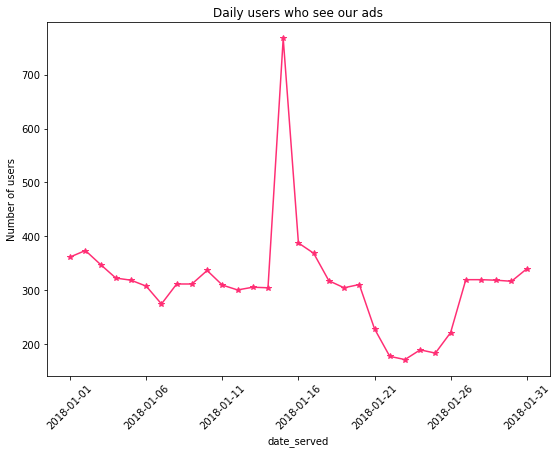

In [105]:
# Plot daily_users
daily_users.plot(marker='*', color='#FF2E74')
plt.title('Daily users who see our ads')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()

date_served  marketing_channel
2018-01-01   Email                  1
             Facebook              68
             House Ads            189
             Instagram             75
             Push                  36
Name: user_id, dtype: int64


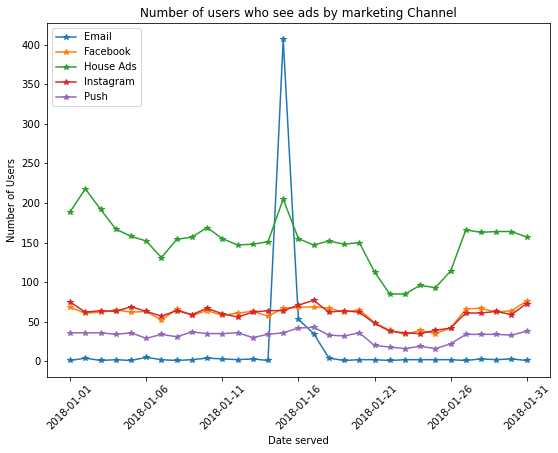

In [106]:
# Total users with date and channel
total_usersss = marketing.groupby(['date_served',
                                     'marketing_channel'])\
                                       ['user_id'].nunique()
print(total_usersss.head())


total_users_daily_df = pd.DataFrame(total_usersss.unstack(level=1))

# Plotting
total_users_daily_df.plot(marker='*')

plt.title('Number of users who see ads by marketing Channel')
plt.xlabel('Date served')
plt.ylabel('Number of Users')
plt.xticks(rotation = 45)
plt.rcParams["figure.figsize"] = (9,6.5)
plt.legend(loc = 'upper left', 
           labels = total_users_daily_df.columns.values)
plt.show()

## Quickly, lets check how marketing channels is targeting different age groups.

age_group          0-18 years  19-24 years  24-30 years  30-36 years  \
marketing_channel                                                      
Email                      93          111          120           60   
Facebook                  264          347          296          249   
House Ads                 694          761          681          699   
Instagram                 300          315          286          259   
Push                      186          145          183           86   

age_group          36-45 years  45-55 years  55+ years  
marketing_channel                                       
Email                       63           65         53  
Facebook                   226          299        179  
House Ads                  589          678        631  
Instagram                  280          227        204  
Push                       193           82        118  


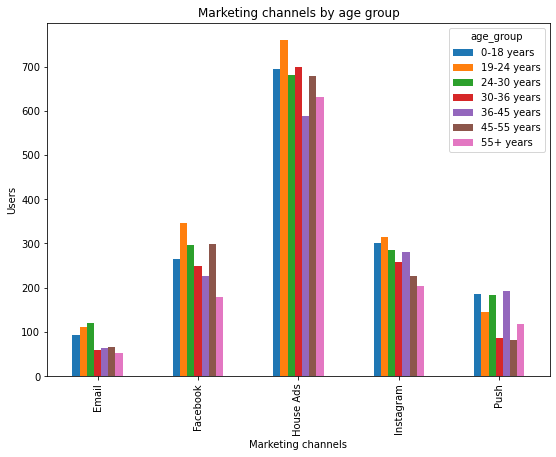

In [107]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()
                            
users_channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

print(users_channel_age_df)

#plotting the chart
users_channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Marketing channels')
plt.ylabel('Users')
plt.show()

## Then we will start looking on our Key Performance Indicators (KPI's) to analyse the performance of the campaign.
1. Conversion rate
2. Retention rate
3. Engagement rate
4. Click through rate
5. Customer Acquisition Cost (CAC) and so on..

But for this task as per the requirement, I am considering only Conversion Rate

In [108]:
subscribers = marketing[marketing['converted'] == True]\
['user_id'].nunique()

print(subscribers)

1030


In [109]:
total = marketing['user_id'].nunique()

print(total)

7309


In [110]:
conversion_rate = subscribers/total

print(round(conversion_rate*100, 2), "%")

14.09 %


## So after calculating the KPI's, Its time to segment the customers to see which subscribing channel is performing better.

In [111]:
 # Subscribers who are converted grouping by channel
subscribers_channel = marketing[(marketing['converted'] == True) ]\
            .groupby(['marketing_channel'])\
            ['user_id'].nunique() 

print(subscribers_channel)

marketing_channel
Email        187
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


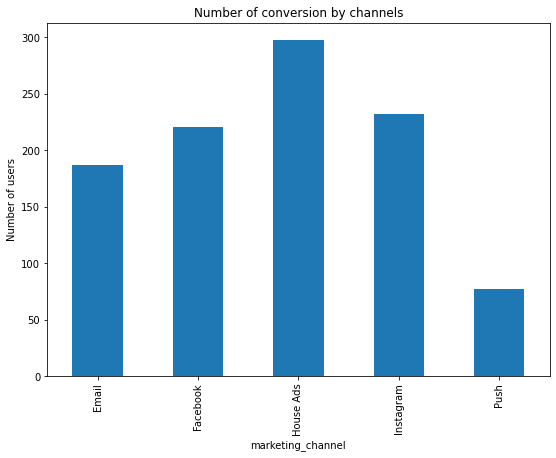

In [112]:
subscribers_channel.plot(kind = 'bar')
plt.title('Number of conversion by channels')
plt.xlabel('marketing_channel')
plt.ylabel('Number of users')
plt.show()

# Now lets see how different age groups are being converted

age_group          0-18 years  19-24 years  24-30 years  30-36 years  \
marketing_channel                                                      
Email                      39           52           52           13   
Facebook                   49           78           49           21   
House Ads                  58           58           58           31   
Instagram                  39          101           56           13   
Push                       16           25           23            4   

age_group          36-45 years  45-55 years  55+ years  
marketing_channel                                       
Email                       12           15         10  
Facebook                    13            9         18  
House Ads                   31           31         31  
Instagram                   19           20         17  
Push                         3            5          7  


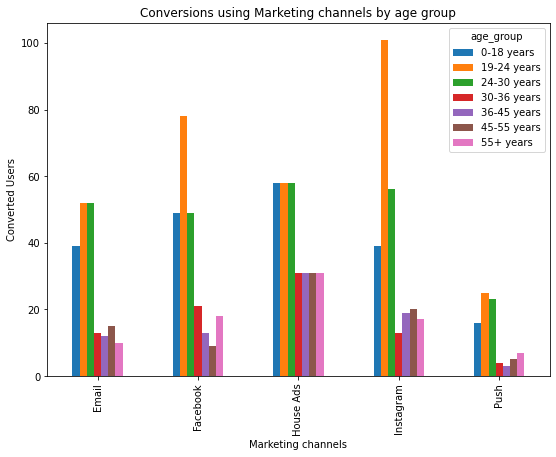

In [135]:
conversion_age_channel = marketing[(marketing['converted'] == True) ]\
                        .groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

conversion_age_channel_df = pd.DataFrame(conversion_age_channel.unstack(level = 1))

print(conversion_age_channel_df)

#plotting the chart
conversion_age_channel_df.plot(kind = 'bar')
plt.title('Conversions using Marketing channels by age group')
plt.xlabel('Marketing channels')
plt.ylabel('Converted Users')
plt.show()


# Till now we saw the conversions by specific marketing channels but to find the efficiency we need to check conversion rate

In [114]:
# Conversion rate using Marketing channel
total_users_channel = marketing.groupby(['marketing_channel'])\
                    ['user_id'].nunique()

print(total_users_channel)


channel_conversion_rate = (subscribers_channel/total_users_channel)*100 
print(channel_conversion_rate)

marketing_channel
Email         553
Facebook     1758
House Ads    3968
Instagram    1740
Push          972
Name: user_id, dtype: int64
marketing_channel
Email        33.815552
Facebook     12.571104
House Ads     7.510081
Instagram    13.333333
Push          7.921811
Name: user_id, dtype: float64


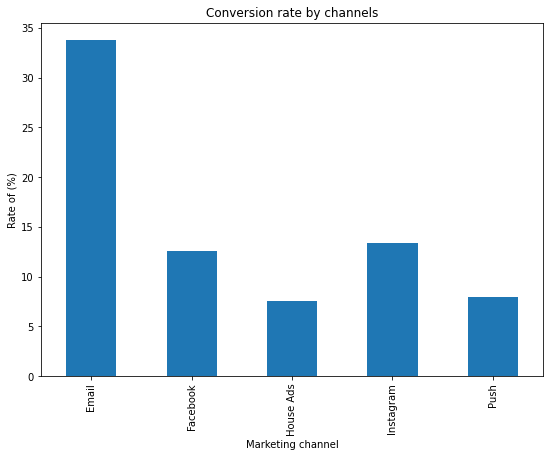

In [115]:
channel_conversion_rate.plot(kind = 'bar')
plt.title('Conversion rate by channels')
plt.xlabel('Marketing channel')
plt.ylabel('Rate of (%)')
plt.show()

## Now lets breakdown the calculations day by day.

In [116]:
# Daily total users
daily_total_users = marketing.groupby(['date_served'])\
            ['user_id'].nunique()

# Daily Subscribers
daily_subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Conversion rate wrt all languages
daily_conversion_rate = daily_subscribers/daily_total_users
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


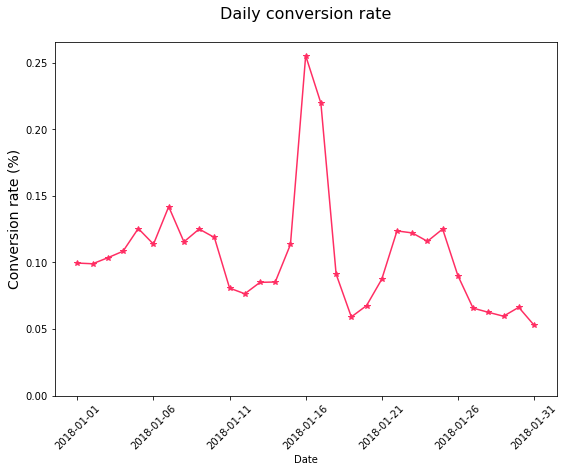

In [117]:
# Charting daily_conversion_rate
daily_conversion_rate.plot(marker='*', color='#FF2E63')
plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 10)
plt.ylim(0)
plt.xticks(rotation = 45)
plt.show()

## Now lets see the daily conversion rate with marketing channels

In [118]:
# Daily total users
daily_total_users = marketing.groupby(['date_served'])\
            ['user_id'].nunique()

# Daily Subscribers
daily_subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Conversion rate wrt all languages
daily_conversion_rate = daily_subscribers/daily_total_users
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


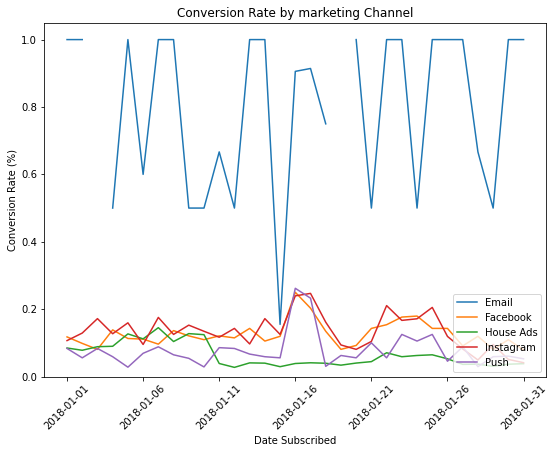

In [119]:
# Total subscribers with date and channel
total_subs = marketing.groupby(['date_served',
                                     'marketing_channel'])\
                                       ['user_id'].nunique()
#print(total_subs.head())


# Total Converted subscribers
converted_subs = marketing[marketing['converted'] == True]\
                           .groupby(['date_served',
                                     'marketing_channel'])\
                            ['user_id'].nunique()
#print(converted_subs.head())

conversion_rate_daily = converted_subs/total_subs
conversion_rate_daily_df = pd.DataFrame(conversion_rate_daily.unstack(level=1))

# Plotting
conversion_rate_daily_df.plot()

plt.title('Conversion Rate by marketing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation = 45)
plt.ylim(0)
plt.rcParams["figure.figsize"] = (9,6.5)
plt.legend(loc = 'lower right', 
           labels = conversion_rate_daily_df.columns.values)
plt.show()

## Lets create Functions to make calculation a bit easy
## Conversion Function

In [120]:
def conversion_rate(dataframe, column_names):
    
# Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()
   
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    conversion_rate = column_conv/column_total
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

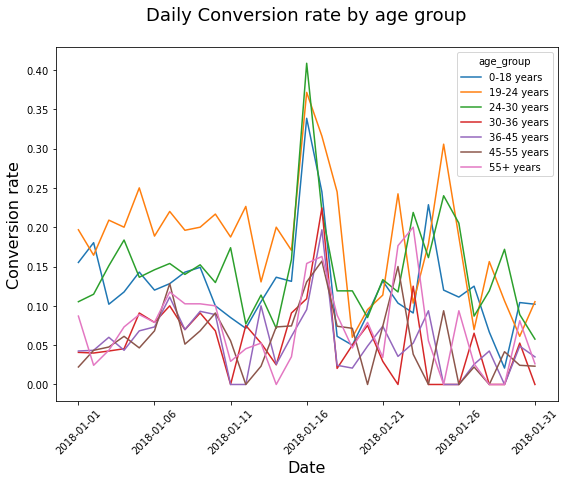

In [121]:
# conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served',
                                             'age_group'])

age_group_conv_ch = conversion_rate(marketing, ['date_served',
                                             'marketing_channel'])
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))
age_group_ch_df = pd.DataFrame(age_group_conv_ch.unstack(level = 1))
age_group_df.plot()
plt.title('Daily Conversion rate by age group\n', size = 18)
plt.ylabel('Conversion rate', size = 16)
plt.xlabel('Date', size = 16)
plt.rcParams["figure.figsize"] = (9,6.5)
plt.xticks(rotation = 45)
plt.show()



## Plotting Function

In [122]:

def plotting_conv(dataframe):
    for column in dataframe:

        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date')
        plt.xticks(rotation = 45)
        plt.rcParams["figure.figsize"] = (9,6.5)
        plt.show() 
        plt.clf()

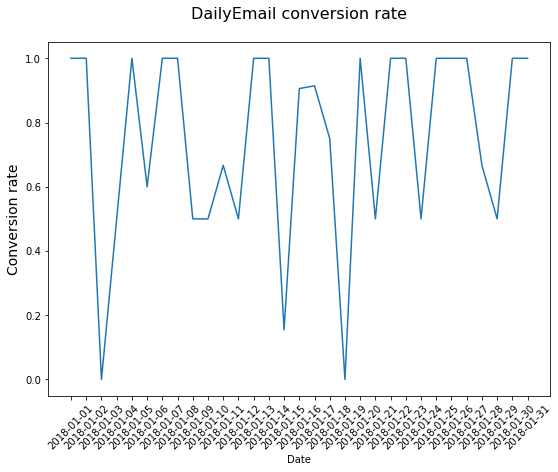

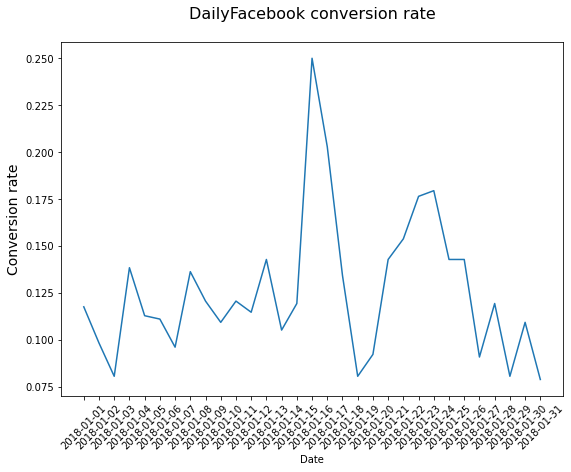

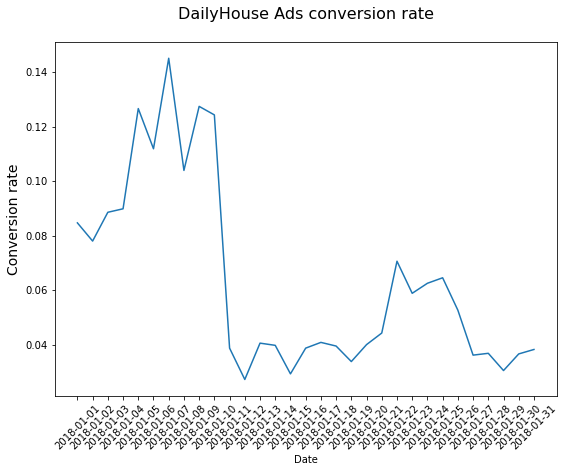

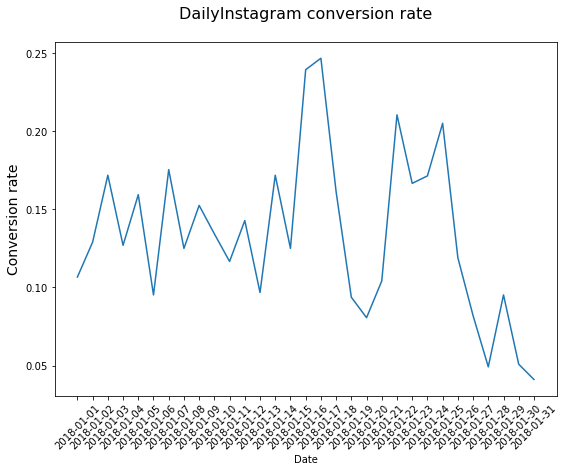

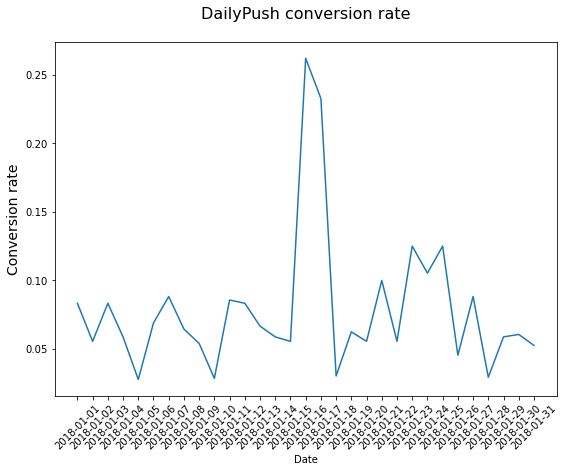

<Figure size 648x468 with 0 Axes>

In [123]:
# Conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'marketing_channel'])
                                 
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

plotting_conv(age_group_df)



## We see clear downfall in house ads. So lets see what is the reason behind that downfall.

## When looking at the data, I figured that there is a language column which might be the reason.
## So Now lets see by segmenting with languages

In [124]:
# English speakers dataframe
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Total number of english speaking users
total_english = english_speakers['user_id'].nunique()

# Number of english speakers who were converted
subscribers_english = english_speakers[english_speakers['converted'] == True]\
           		 ['user_id'].nunique()

# Conversion rate
conversion_rate_english = subscribers_english/total_english 
print(round(conversion_rate_english*100,2), '%')

13.13 %


## Above we calculated for total conversions from english speakers,but now lets see the conversion rate by grouping with language_displayed. Lets see if we get any valuable information.

In [125]:
# Grouped by Language_displayed and counting unique users
total_language_rate = marketing.groupby(['language_displayed'])\
                        ['user_id'].nunique()

# Grouped by language_displayed and count unique conversions
subscribers_language_rate = marketing[marketing['converted'] == True]\
                       .groupby(['language_displayed'])\
                       ['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers_language_rate/total_language_rate
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


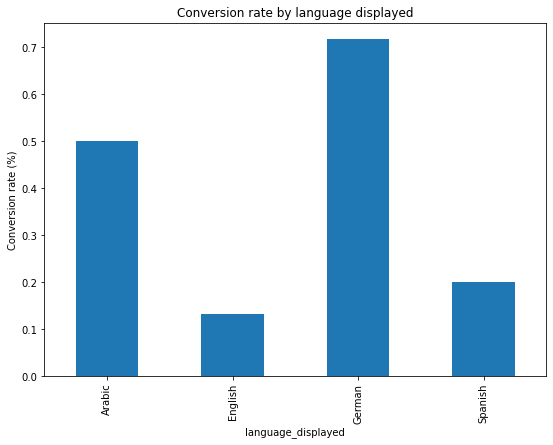

In [126]:
language_conversion_rate.plot(kind = 'bar')
plt.title('Conversion rate by language displayed')
plt.xlabel('language_displayed')
plt.ylabel('Conversion rate (%)')
plt.show()

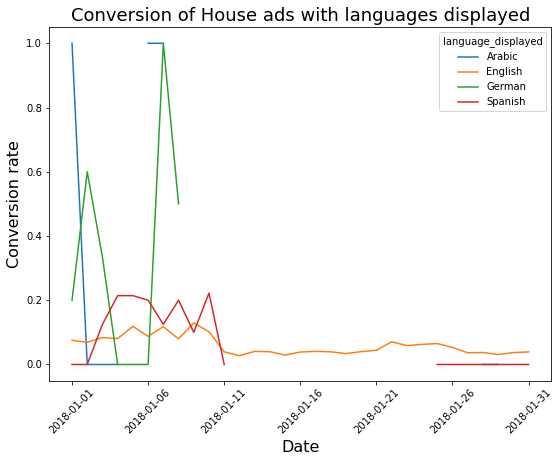

In [127]:
# house ads dataframe
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# House ads with language displayed
conv_lang_channel = conversion_rate(house_ads, 
                                    ['date_served', 
                                    'language_displayed'])

conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

conv_lang_df.plot()
plt.title('Conversion of House ads with languages displayed', size = 18)
plt.ylabel('Conversion rate', size = 16)
plt.xlabel('Date', size = 16)
plt.rcParams["figure.figsize"] = (9,6.5)
plt.xticks(rotation = 45)
plt.show()

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


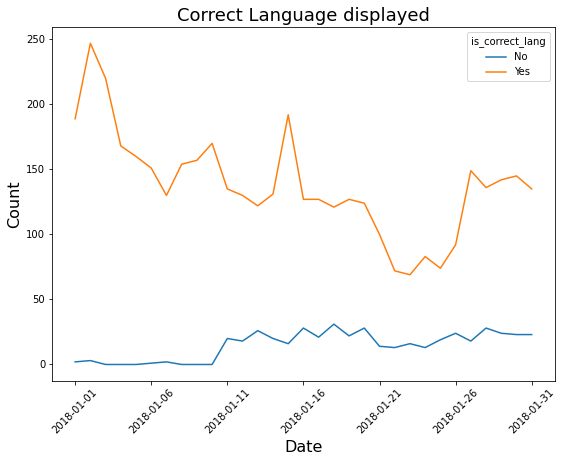

In [128]:
# Language check
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

print(language_check_df)

language_check_df.plot()
plt.title('Correct Language displayed', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Date', size = 16)
plt.rcParams["figure.figsize"] = (9,6.5)
plt.xticks(rotation = 45)
plt.show()


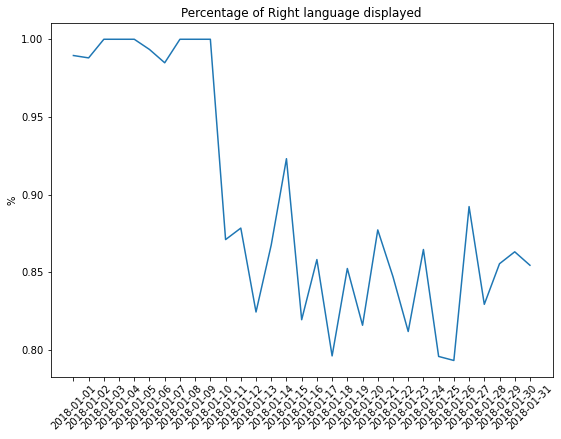

In [129]:
# Showing how much percent of people is showed false language 
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.title('Percentage of Right language displayed')
plt.ylabel('%')
plt.xticks(rotation = 45)
plt.show()